## Problem Statement

# Make a machine Learning Model to predict total profit gained 

### Importing Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Reading dataset file

In [4]:
df=pd.read_csv('50_Startups.csv')

In [11]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [6]:
len(df)

50

### EDA

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [9]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


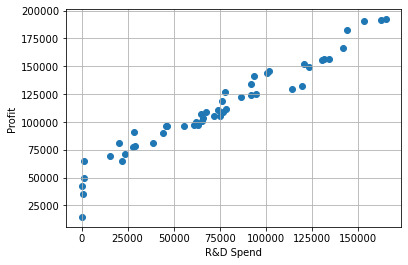

In [12]:
plt.scatter(df['R&D Spend'],df['Profit'])
plt.xlabel('R&D Spend')
plt.ylabel('Profit')
plt.grid()

In [13]:
import seaborn as sns

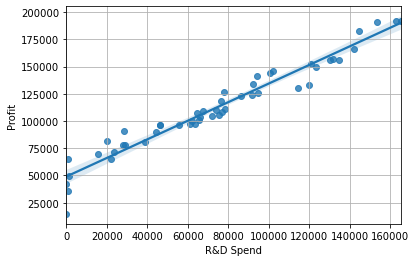

In [15]:
sns.regplot(x='R&D Spend',y='Profit',data=df)
plt.grid()


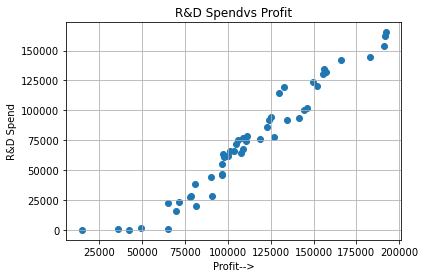

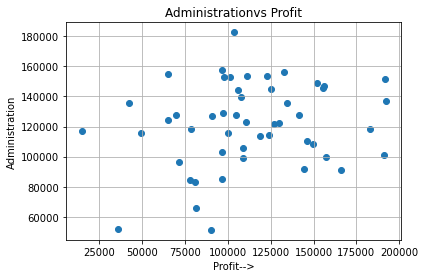

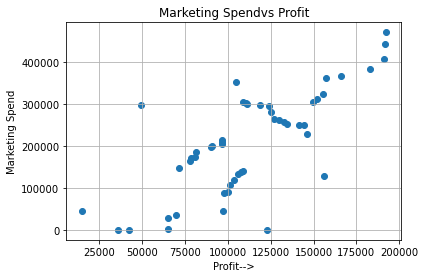

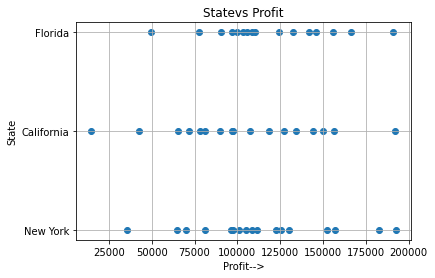

In [16]:
for i in df.columns[:-1]:
    plt.scatter(df['Profit'],df[i])
    plt.xlabel('Profit-->')
    plt.ylabel(i)
    plt.title(i + 'vs Profit')
    plt.grid()
    plt.show()

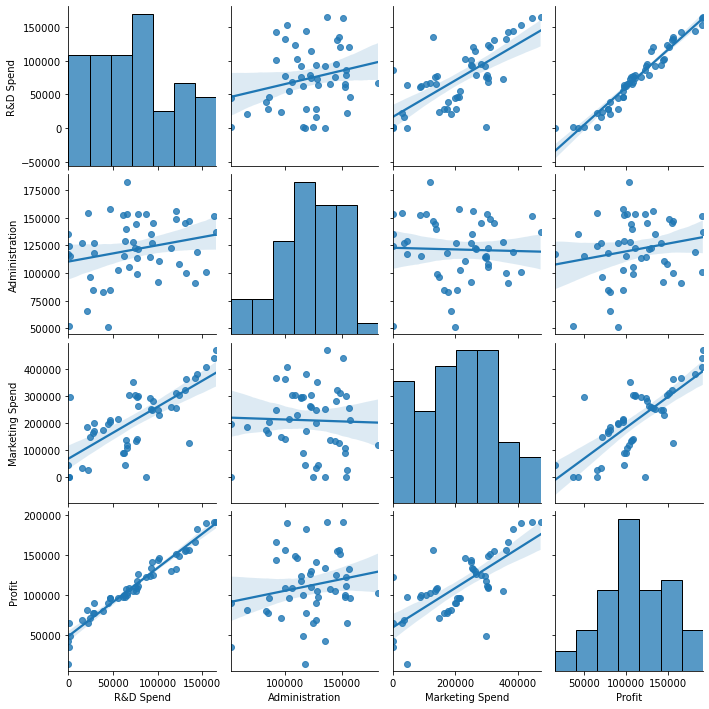

In [17]:
sns.pairplot(df,kind='reg')

In [22]:
x=df[['R&D Spend','Marketing Spend']]
y=df[['Profit']]

In [23]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Marketing Spend  50 non-null     float64
dtypes: float64(2)
memory usage: 928.0 bytes


In [24]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Profit  50 non-null     float64
dtypes: float64(1)
memory usage: 528.0 bytes


### 1..Splitting the data

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
xtrain,xtest,ytrain,ytest =train_test_split(x,y,test_size=0.25,random_state=10)

In [29]:
xtrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37 entries, 32 to 9
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        37 non-null     float64
 1   Marketing Spend  37 non-null     float64
dtypes: float64(2)
memory usage: 888.0 bytes


In [31]:
xtest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13 entries, 37 to 40
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        13 non-null     float64
 1   Marketing Spend  13 non-null     float64
dtypes: float64(2)
memory usage: 312.0 bytes


In [32]:
xtest.shape

(13, 2)

In [33]:
xtrain.shape

(37, 2)

In [34]:
xtrain.head()

,R&D Spend,Marketing Spend
32,63408.86,46085.25
10,101913.08,229160.95
21,78389.47,299737.29
35,46014.02,205517.64
27,72107.60,353183.81


### 2..Creating and Training machine learning Model

In [35]:
from sklearn.linear_model import LinearRegression

In [36]:
model =LinearRegression().fit(xtrain,ytrain)

In [37]:
model.coef_

array([[0.79150324, 0.0238557 ]])

### 4.Evaluation

In [38]:
print('%.1f%%'%(model.score(xtest,ytest) * 100))

98.7%


In [39]:
ypred=model.predict(xtest)

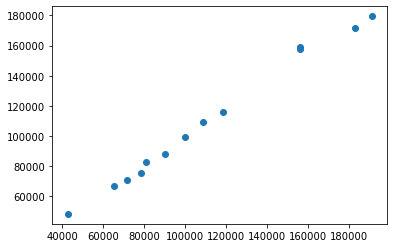

In [41]:
plt.scatter(ytest,ypred)

### 5.Deployment

In [42]:
final_model =model

In [43]:
pd.to_pickle(final_model,'StartupProfitPredictor')